In [1]:
!pip install pyBibX
!pip install tabulate

In [2]:
# Required Libraries
import numpy as np
import pandas as pd
import textwrap

In [3]:
pip install -U prettytable

Note: you may need to restart the kernel to use updated packages.


In [4]:
from tabulate import tabulate
from prettytable import PrettyTable
from pyBibX.base import pbx_probe

In [5]:
# Load .bib
# Arguments: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
file_name = 'scopus_170.bib'
database  = 'scopus'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 169 Documents were Found ( 169 Documents and 0 Duplicates )

Article = 86
Book = 7
Book chapter = 19
Conference paper = 12
Editorial = 1
Review = 43
Short survey = 1


In [6]:
# Health Analysis
health = bibfile.health_bib()

# Check Health
health

Entries Completeness (%)
0             Sources          100.00%
1           Abstracts           98.82%
2        Institutions           98.82%
3           Author(s)           99.41%
4                 DOI           98.22%
5  Keywords - Authors           78.70%
6     Keywords - Plus           73.37%
7          References            0.00%
8                Year          100.00%

In [7]:
# Generate EDA (Exploratory Data Analysis) Report
report  = bibfile.eda_bib()

# Check Report
report

Main Information    Results
0                                Timespan  2019-2024
1               Total Number of Countries         42
2            Total Number of Institutions        369
3                 Total Number of Sources        112
4              Total Number of References          0
5               Total Number of Languages          3
6                   --chinese (# of docs)          2
7                   --english (# of docs)        166
8                  --japanese (# of docs)          1
9                                    -//-       -//-
10              Total Number of Documents        169
11                              --Article         86
12                                 --Book          7
13                         --Book chapter         19
14                     --Conference paper         12
15                            --Editorial          1
16                               --Review         43
17                         --Short survey          1
18           Average Documents per Author       1.09
19      Average Documents per Institution       2.33
20           Average Documents per Source       1.51
21             Average Documents per Year      28.17
22                                   -//-       -//-
23                Total Number of Authors        771
24       Total Number of Authors Keywords        568
25  Total Number of Authors Keywords Plus       1425
26        Total Single-Authored Documents          8
27         Total Multi-Authored Documents        161
28            Average Collaboration Index       4.98
29                            Max H-Index          8
30                                   -//-       -//-
31              Total Number of Citations       2682
32           Average Citations per Author       3.48
33      Average Citations per Institution       7.27
34         Average Citations per Document      15.87
35           Average Citations per Source      23.95
36                                   -//-       -//-

In [8]:
# The metadata can be reviewed and manually modified. If you need to make adjustments, you can directly edit the bibfile.data, which is a DataFrame containing all the utilized information.
print(tabulate(bibfile.data.head(n = 10), headers = 'keys', tablefmt = 'psql'))
# Modify 'bibfile.data' as needed.

+----+-------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

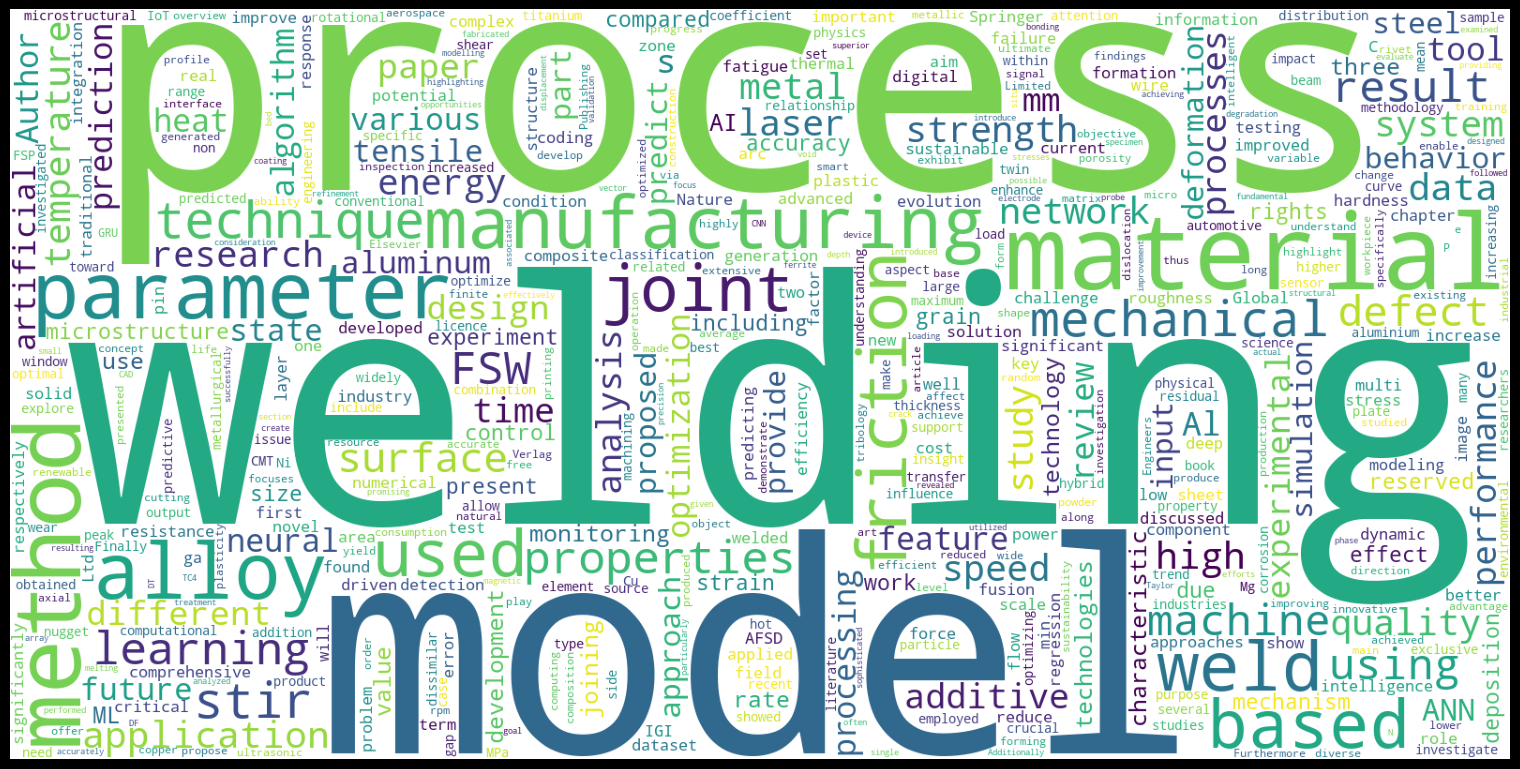

In [9]:
# WordClound from the Abstracts, Title, Authors Keywords or Keywords Plus

# Arguments: antry = 'abs', 'title', 'kwa' or 'kwp'

bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500) 

In [10]:
# Check Table
table             = PrettyTable()
data_wd           = bibfile.ask_gpt_wd
table.field_names = ['Word', 'Importance']
for key, value in data_wd.items():
    table.add_row([key, round(value, 4)])
print(table)

+-----------------+------------+
|       Word      | Importance |
+-----------------+------------+
|     welding     |    1.0     |
|     process     |   0.8274   |
|      model      |   0.7557   |
|     material    |   0.6124   |
|      method     |   0.4593   |
|    parameter    |   0.456    |
|      alloy      |   0.4463   |
|  manufacturing  |   0.4332   |
|       weld      |   0.3941   |
|     friction    |   0.3844   |
|      based      |   0.3779   |
|       used      |   0.3616   |
|      joint      |   0.355    |
|    technique    |   0.3453   |
|    mechanical   |   0.3322   |
|       stir      |   0.329    |
|    properties   |   0.3257   |
|     learning    |   0.3192   |
|       FSW       |   0.3127   |
|      result     |   0.3029   |
|      using      |   0.2899   |
|     machine     |   0.2866   |
|      defect     |   0.2769   |
|     surface     |   0.2671   |
|   application   |   0.2638   |
|       high      |   0.2638   |
|       data      |   0.2638   |
|   temper

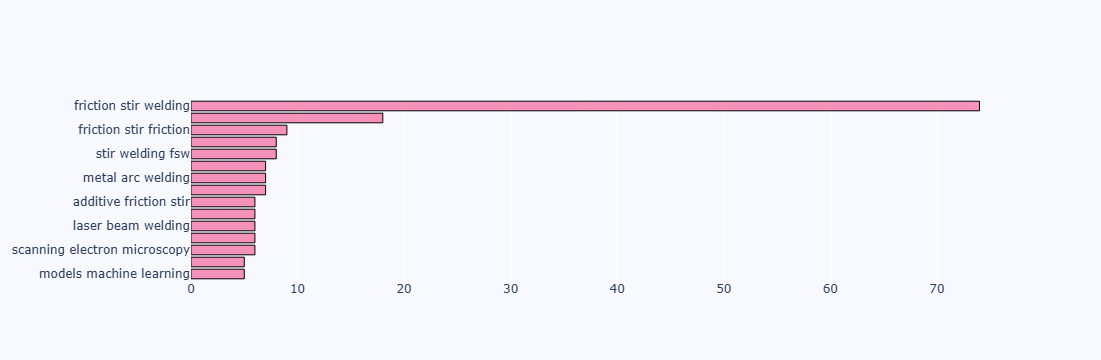

In [11]:
# N-Grams
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                         'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                         'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Portuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                         'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#             wordsn           = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

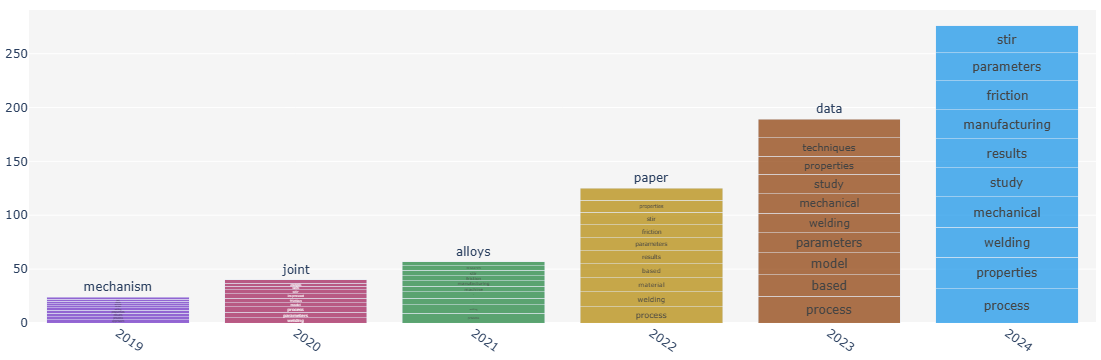

In [12]:
# Documents Projection based on Words. (An interactive plot). It returns the Projection (each document coordinate) and the Labels (each document cluster)
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Number of Clusters;
#            node_labels       = If True, labels appear in nodes
#            node_size         = Node size
#            node_font_size    = Node font size
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used)
#projection, labels = bibfile.docs_projection

bibfile.plot_evolution_year(view                               = 'notebook',
                                            #corpus_type       = 'abs',
                                             stop_words        = ['en'],
                                             rmv_custom_words  = [],
                                             key               = 'abs',
                                             topn              = 10,
                                             txt_font_size     = 12,
                                             start             = 2010,
                                             end               = 2024)
                                            # custom_label      = [],
                                            # custom_projection = [],
                                            # n_components      = 2,
                                            # n_clusters        = 5,
                                            # node_labels       = True,
                                            # node_size         = 12,
                                            # node_font_size    = 5,
                                            # tf_idf            = False,
                                            # embeddings        = False,
                                            # method            = 'umap')

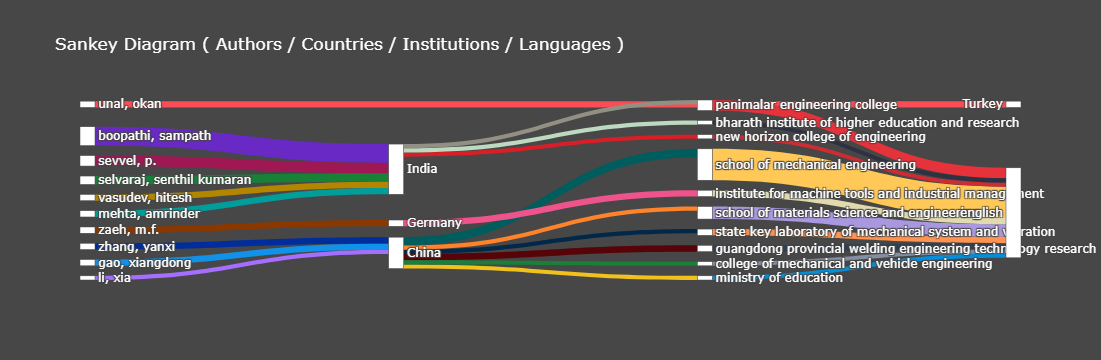

In [13]:
# Sankey Diagram (An interactive plot)
# Arguments: view  = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry = a list of any length of the following keys -> 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan';
#            topn  = Total number entities
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'inst', 'lan'], topn = 10)

# PS: The white bars can be dragged

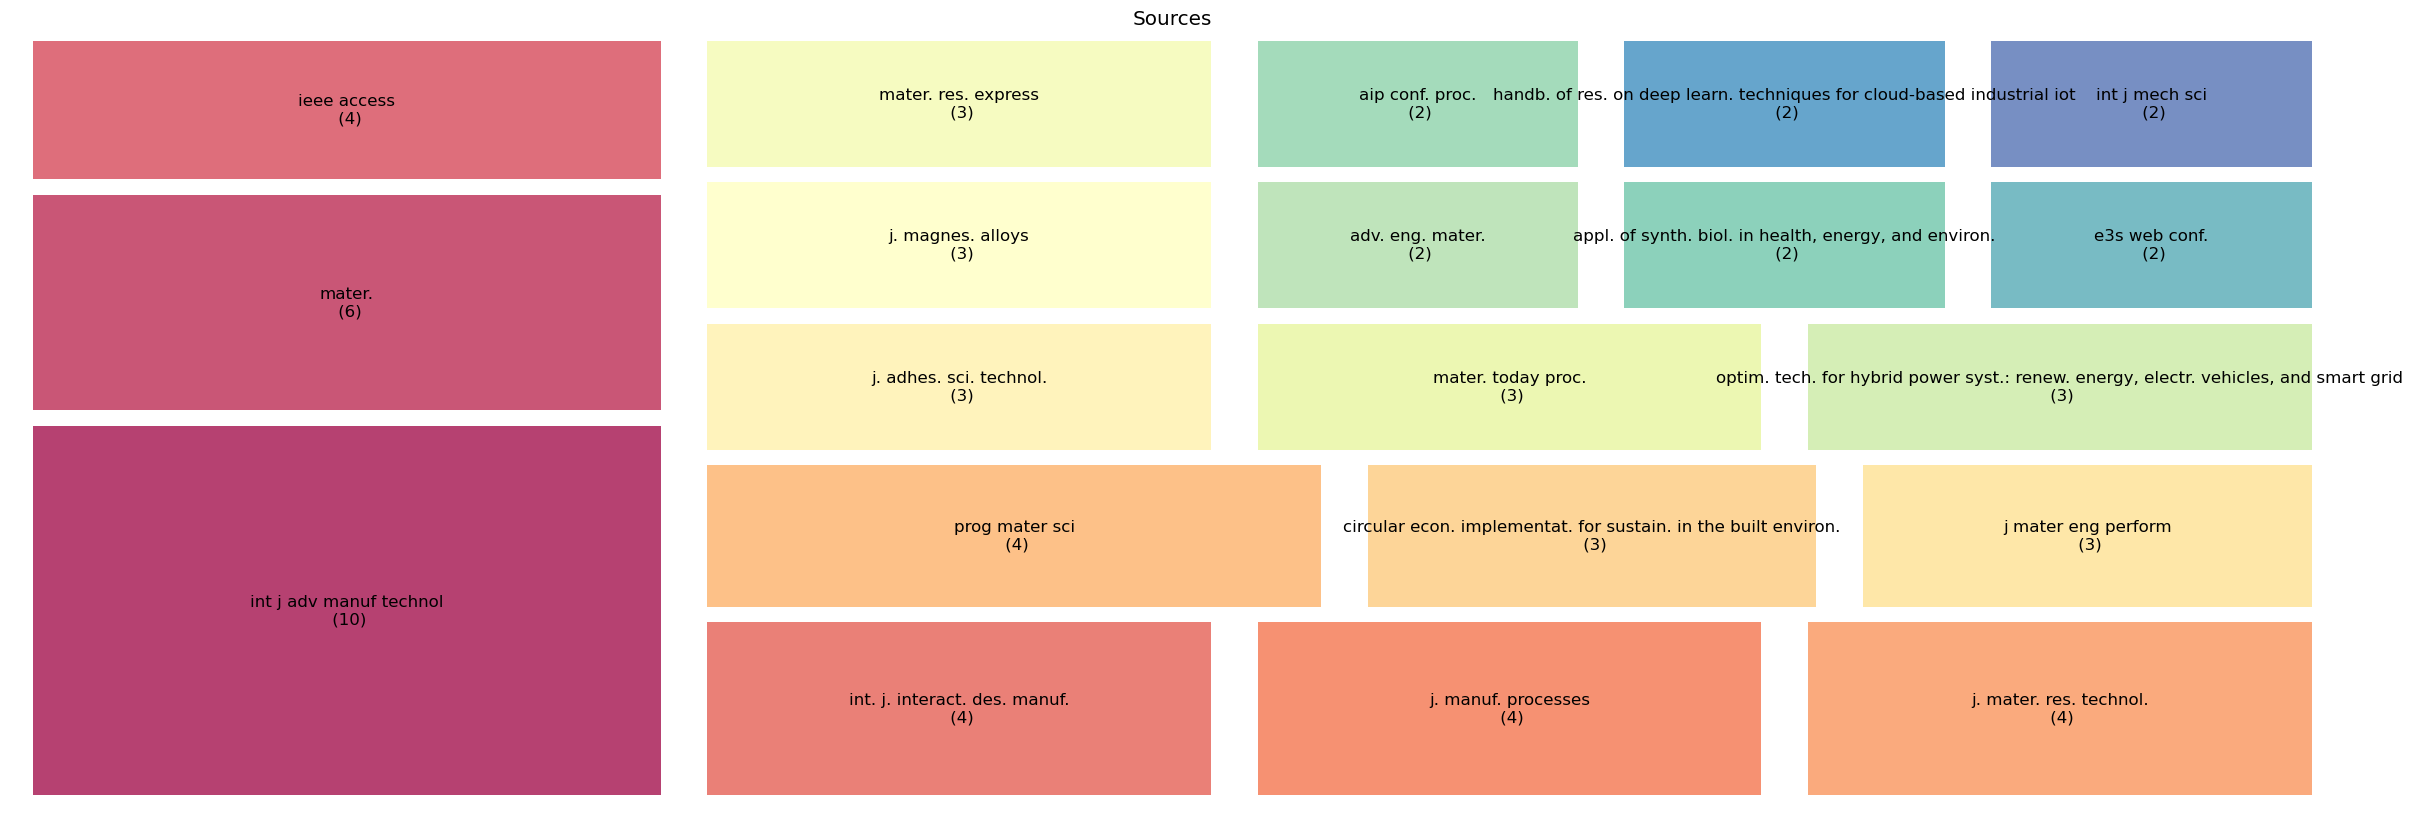

In [14]:
# Tree Map
# Arguments: entry         = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn          = Total number entities
#            txt_font_size = Font size of the text inside the bins;
bibfile.tree_map(entry = 'jou', topn = 20, size_x = 30, size_y = 10, txt_font_size = 12)

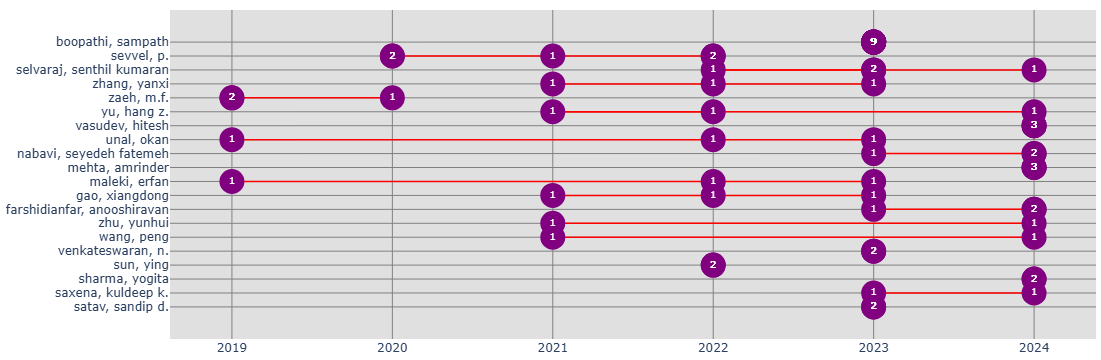

In [15]:
# Authors Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each author
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.authors_productivity(view = 'notebook', topn = 20)

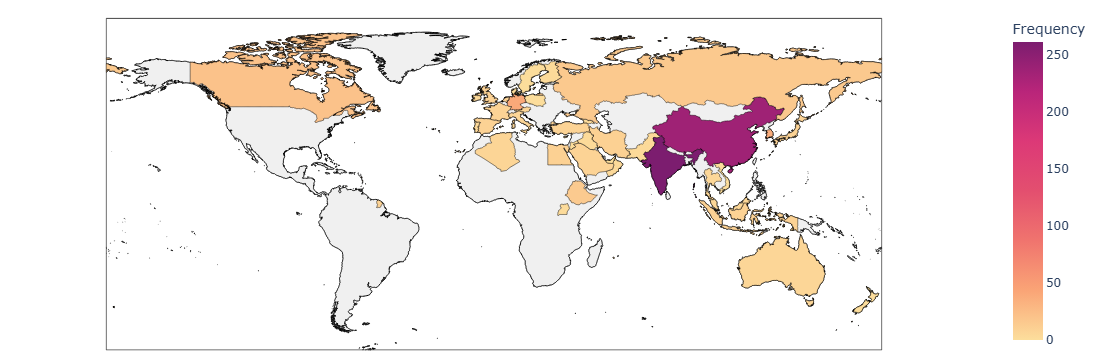

In [31]:
# Countries Productivity Plot (An interactive plot). It informs the production for each Country (count is made considering each doc author)
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
bibfile.countries_productivity(view = 'notebook')

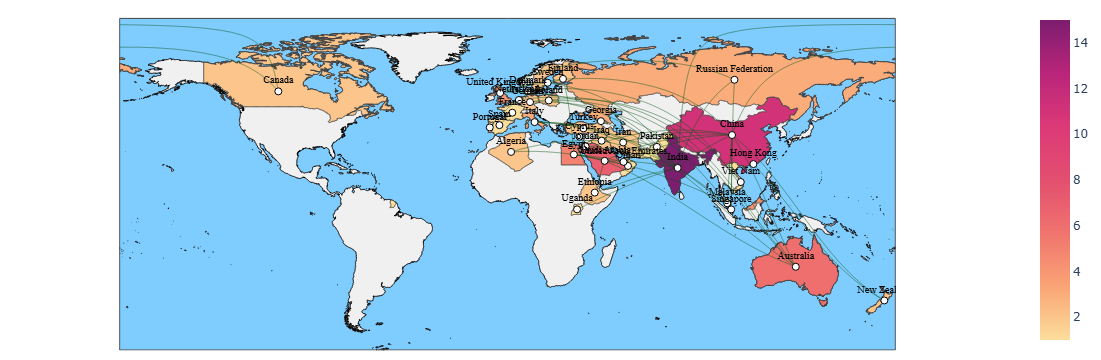

In [33]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

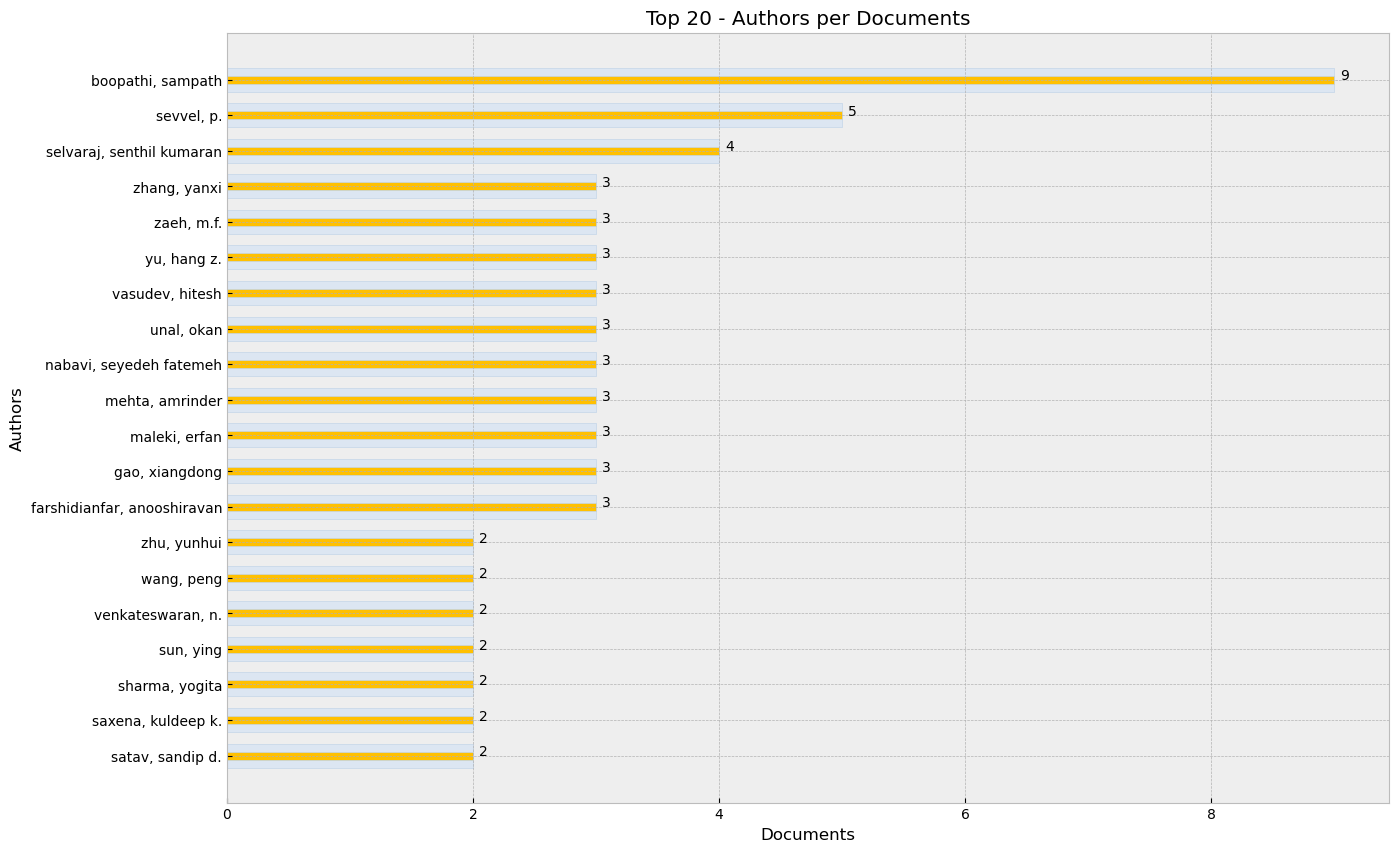

In [35]:
# Bar Plots
# Arguments: statistic = 'dpy', 'cpy', 'ppy', 'ltk', 'spd', 'spc', 'apd', 'apc', 'aph', 'bdf_1', 'bdf_2', 'bdf_3', 'ipd', 'ipc', 'cpd', 'cpc', 'lpd', 'kpd', 'kad'
#                        'dpy' = Documents per Year
#                         cpy' = Citations per Year
#                        'ppy' = Past Citations per Year
#                        'ltk' = Lotka's Law
#                        'spd' = Sources per Documents
#                        'spc' = Sources per Citations
#                        'apd' = Authors per Documents
#                        'apc' = Authors per Citations
#                        'aph' = Authors per H-Index
#                        'bdf_1', 'bdf_2', 'bdf_3' = Bradford's Law - Core Sources 1, 2 or 3
#                        'ipd' = Institutions per Documents
#                        'ipc' = Institutions per Citations
#                        'cpd' = Countries per Documents
#                        'cpc' = Countries per Citations
#                        'lpd' = Language per Documents
#                        'kpd' = Keywords Plus per Documents
#                        'kad' = Authors' Keywords per Documents
#            topn      = Total number entities
bibfile.plot_bars(statistic = 'apd', topn = 20, size_x = 15, size_y = 10)

Main Node: boopathi, sampath
Links: ['meenakshi, s.', 'munjal, neha', 'muralidharan, n.', 'pradeep, n.', 'roopa, h.', 'sabarimuthu, m.', 'sultanuddin, s.j.']

Main Node: sevvel, p.
Links: ['babu, s. d. dhanesh', 'dhanesh babu, s.d.', 'john solomon, i.', 'kumar, b. yokesh', 'kumar, r. senthil', 'satheesh, c.', 'senthil kumar, r.', 'srinivasan, d.']

Main Node: selvaraj, senthil kumaran
Links: ['abraham, abel saji', 'arora, kanwer singh', 'chadha, utkarsh', 'gunreddy, neha', 'puvandran, p.']

Main Node: zhang, yanxi
Links: ['gao, perry p.', 'liu, guiqian', 'ma, nvjie']

Main Node: zaeh, m.f.
Links: ['bachmann, a.', 'hansjakob, j.', 'muehlegg, m.']

Main Node: yu, hang z.
Links: ['higdon, david m.', 'zhu, yuntian']

Main Node: vasudev, hitesh
Links: ['jeyaprakash, n.', 'mehta, amrinder', 'sharma, yogita']

Main Node: unal, okan
Links: ['guagliano, mario', 'maleki, erfan', 'reza kashyzadeh, kazem', 'shao, shuai']

Main Node: nabavi, seyedeh fatemeh
Links: ['esmaili, reihaneh', 'farshidianf

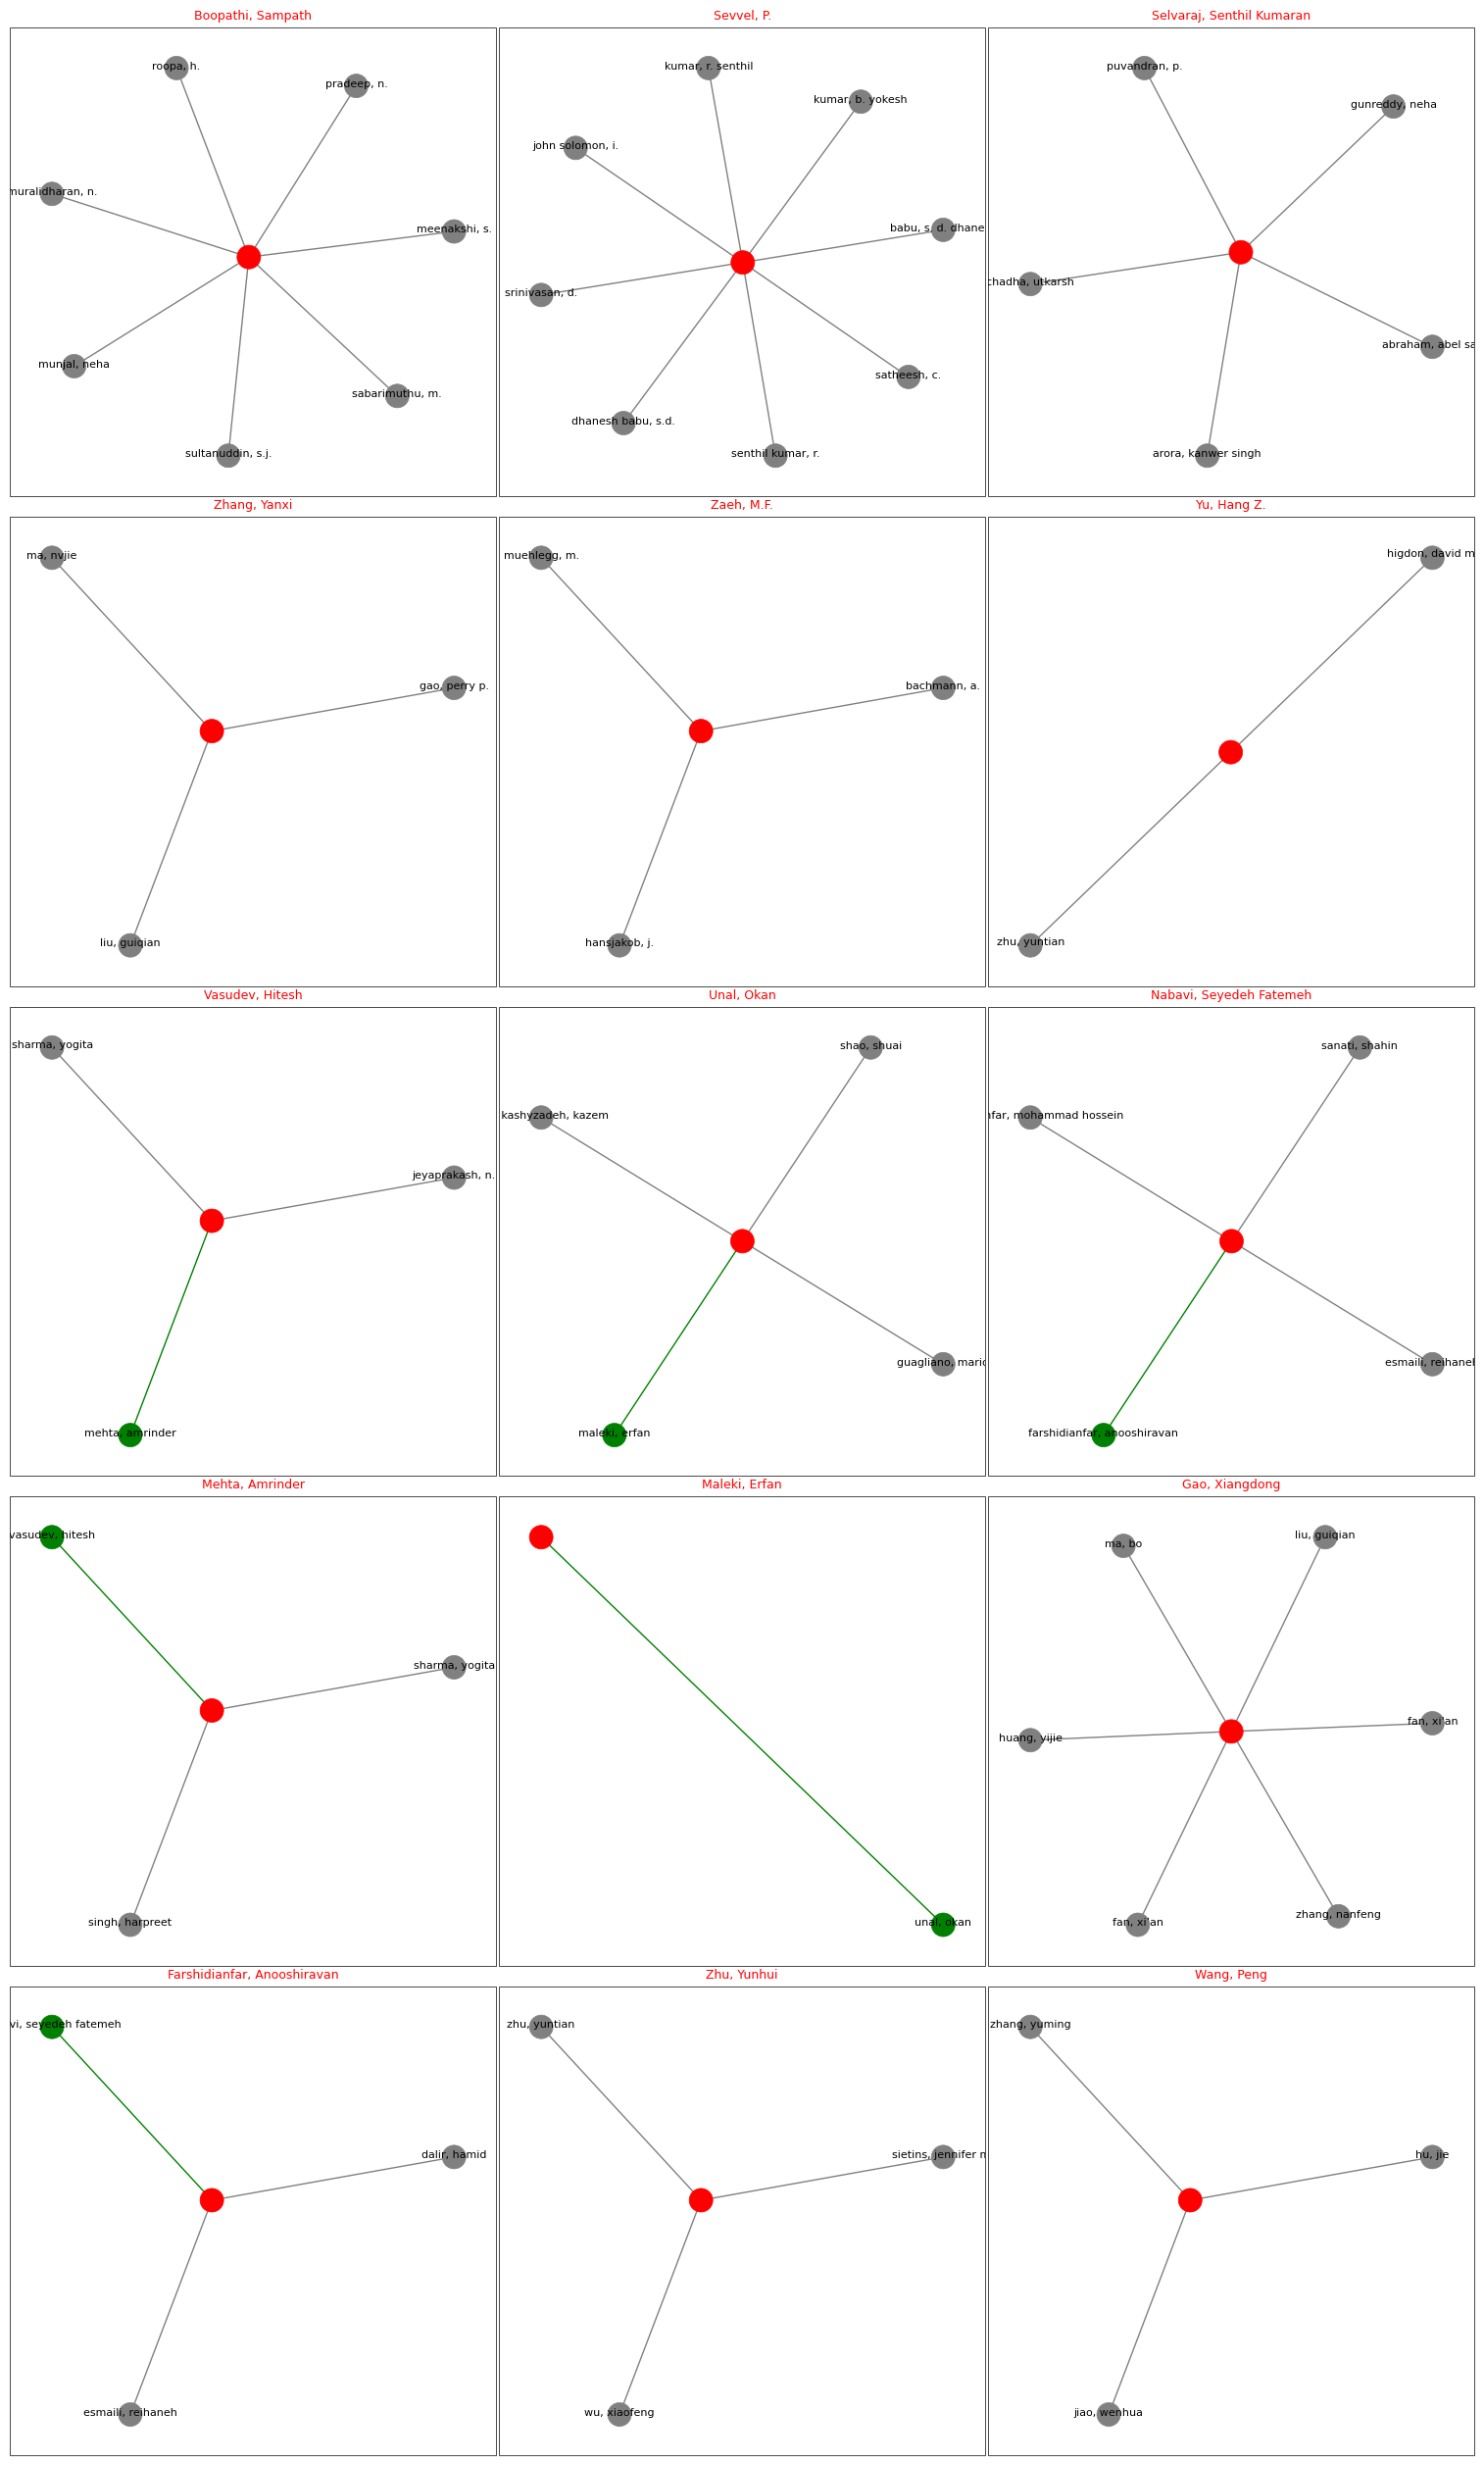

In [37]:
# Arguments:
# entry      = 'aut', 'cout', 'inst', 'kwa', or 'kwp'.
# tgt        = List of specific names.
# topn       = Integer. Specifies the number of top authors to display based on their total contributions.
# rows       = Integer. Defines the number of rows in the subplot grid for the visual layout.
# cols       = Integer. Defines the number of columns in the subplot grid for the visual layout.
# wspace     = Float. Adjusts horizontal spacing between subplots.
# hspace     = Float. Adjusts vertical spacing between subplots.
# tspace     = Float. Sets additional vertical space between nodes and labels for better readability.
# node_size  = Integer. Controls the size of each node in the network graph.
# font_size  = Integer. Defines the font size for node labels.
# pad        = Float. Adjusts padding around the layout for a balanced appearance.
# nd_a       = Color string (e.g., '#FF0000'). Specifies the color for the primary node (main author).
# nd_b       = Color string (e.g., '#008000'). Specifies the color for secondary nodes (authors with significant links).
# nd_c       = Color string (e.g., '#808080'). Specifies the color for other nodes (authors with minor links).
# verbose    = Boolean. If True, prints details of each main node and its connections in the console; if False, suppresses this output.
bibfile.network_collab( entry     = 'aut',
                        tgt       = [],
                        topn      = 15,
                        rows      = 5,
                        cols      = 3,
                        wspace    = 0.2,
                        hspace    = 0.2,
                        tspace    = 0.01,
                        node_size = 300,
                        font_size = 8,
                        pad       = 0.2,
                        nd_a      = '#FF0000',
                        nd_b      = '#008000',
                        nd_c      = '#808080',
                        verbose   = True)

In [39]:
print(bibfile.ask_gpt_ct)

[[['boopathi, sampath'], ['meenakshi, s.', 'munjal, neha', 'muralidharan, n.', 'pradeep, n.', 'roopa, h.', 'sabarimuthu, m.', 'sultanuddin, s.j.']], [['sevvel, p.'], ['babu, s. d. dhanesh', 'dhanesh babu, s.d.', 'john solomon, i.', 'kumar, b. yokesh', 'kumar, r. senthil', 'satheesh, c.', 'senthil kumar, r.', 'srinivasan, d.']], [['selvaraj, senthil kumaran'], ['abraham, abel saji', 'arora, kanwer singh', 'chadha, utkarsh', 'gunreddy, neha', 'puvandran, p.']], [['zhang, yanxi'], ['gao, perry p.', 'liu, guiqian', 'ma, nvjie']], [['zaeh, m.f.'], ['bachmann, a.', 'hansjakob, j.', 'muehlegg, m.']], [['yu, hang z.'], ['higdon, david m.', 'zhu, yuntian']], [['vasudev, hitesh'], ['jeyaprakash, n.', 'mehta, amrinder', 'sharma, yogita']], [['unal, okan'], ['guagliano, mario', 'maleki, erfan', 'reza kashyzadeh, kazem', 'shao, shuai']], [['nabavi, seyedeh fatemeh'], ['esmaili, reihaneh', 'farshidianfar, anooshiravan', 'farshidianfar, mohammad hossein', 'sanati, shahin']], [['mehta, amrinder'], ['s

In [ ]:
# NLP
# Arguments: corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs')
emb = bibfile.embds

In [41]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                              'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                              'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                              'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False)

   Topic  Count                                   Name  \
0     -1      1  -1_field_synthetic_biology_biological   
1      0    150     0_welding_process_model_parameters   
2      1     18        1_energy_iot_sustainable_global   

                                      Representation  \
0  [field, synthetic, biology, biological, biotec...   
1  [welding, process, model, parameters, friction...   
2  [energy, iot, sustainable, global, igi, ai, bo...   

                                 Representative_Docs  
0  [application genetic engineering techniques re...  
1  [welding major manufacturing process joins pie...  
2  [optimization techniques hybrid power systems ...  


In [43]:
# Authors Production per Topic
production_topics = bibfile.topics_authors(topn = 15)
production_topics

-1  0  1  Total
boopathi, sampath             0  3  6      9
sevvel, p.                    0  5  0      5
selvaraj, senthil kumaran     0  4  0      4
zhang, yanxi                  0  3  0      3
zaeh, m.f.                    0  3  0      3
yu, hang z.                   0  3  0      3
vasudev, hitesh               0  3  0      3
unal, okan                    0  3  0      3
nabavi, seyedeh fatemeh       0  3  0      3
mehta, amrinder               0  3  0      3
maleki, erfan                 0  3  0      3
gao, xiangdong                0  3  0      3
farshidianfar, anooshiravan   0  3  0      3
zhu, yunhui                   0  2  0      2
wang, peng                    0  2  0      2

In [45]:
# NLP
# Each document Topic
topics = bibfile.topics

In [47]:
# NLP
# Each document Probability to belong a Topic
probs = bibfile.probs

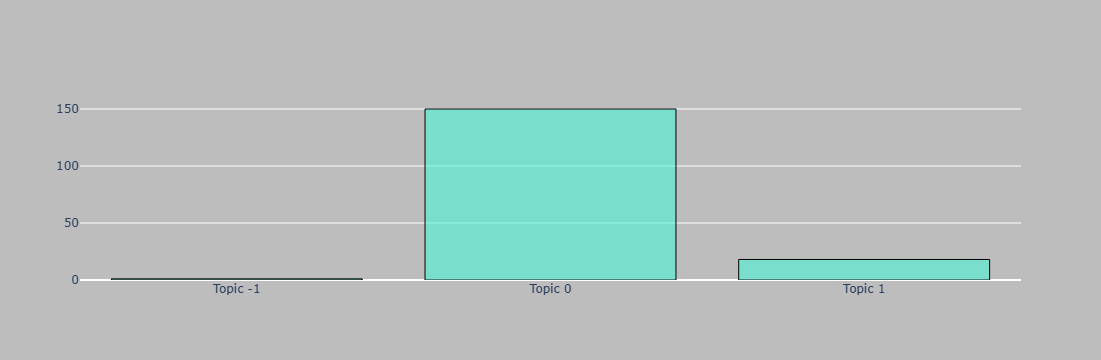

In [49]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_distribution(view = 'notebook')

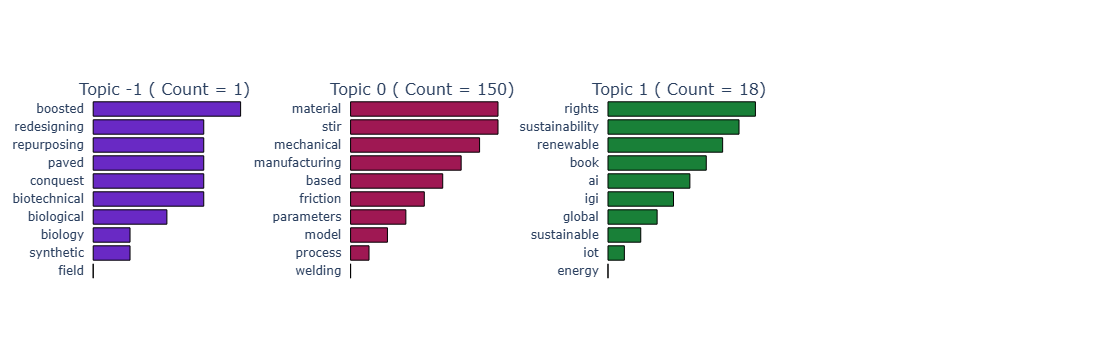

In [51]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics(view = 'notebook')

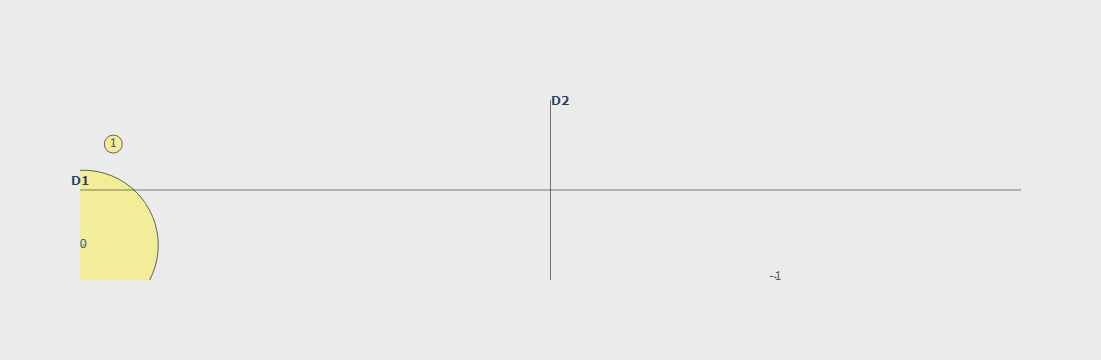

In [55]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_projection(view = 'notebook')

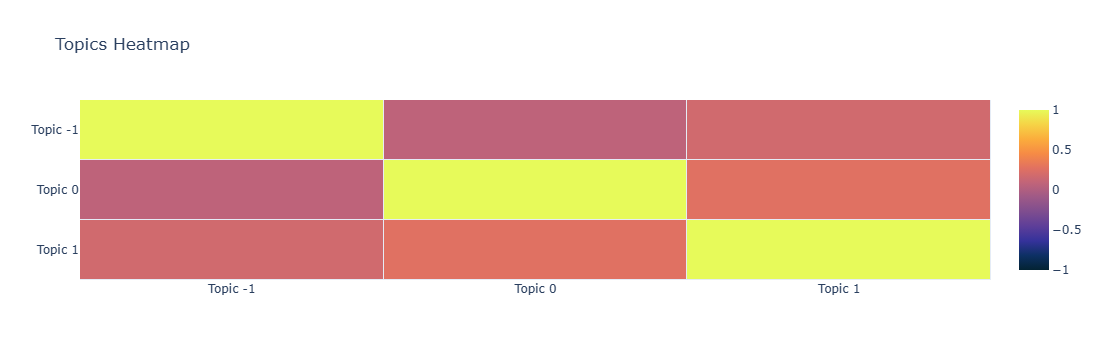

In [53]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_heatmap(view = 'notebook')

In [57]:
# NLP
bibfile.topics_representatives()

Topic         Docs
0   -1.0             
1    0.0  164; 80; 15
2    1.0   70; 47; 30

In [59]:
# NLP
similar_topics, similarity = bibfile.topic_model.find_topics('electre', top_n = 10)
for i in range(0, len(similar_topics)):
  print('Topic: ', similar_topics[i], 'Correlation: ', round(similarity[i], 3))

Topic:  1 Correlation:  0.141
Topic:  -1 Correlation:  -0.012
Topic:  0 Correlation:  -0.037


In [63]:
# W2V
model, corpus, w_emb, vocab = bibfile.word_embeddings(stop_words        = ['en'],
                                                      lowercase         = True,
                                                      rmv_accents       = True,
                                                      rmv_special_chars = False,
                                                      rmv_numbers       = True,
                                                      rmv_custom_words  = [],
                                                      vector_size       = 100,
                                                      window            = 5,
                                                      min_count         = 1,
                                                      epochs            = 10)

In [65]:
# W2V - Similarity
similarity = bibfile.word_embeddings_sim(model, word_1 = 'mcda', word_2 = 'risk')
similarity

0.9478235

In [67]:
# W2V - Find Docs
results = bibfile.word_embeddings_find_doc(corpus, target_words = ['mcda', 'risk'])
results

[]

In [69]:
# W2V - Operations
operations = bibfile.word_embeddings_operations(model, positive = ['mcda', 'group'], negative = ['risk'], topn = 10)
operations

[('cda', 0.9580641388893127),
 ('tube', 0.9524413347244263),
 ('uk', 0.9510173201560974),
 ('pbf', 0.9505859017372131),
 ('amp', 0.9497535228729248),
 ('lfw', 0.949662983417511),
 ('of', 0.94963538646698),
 ('lpbf', 0.9496089220046997),
 ('icme', 0.9494968056678772),
 ('am', 0.9492802619934082)]

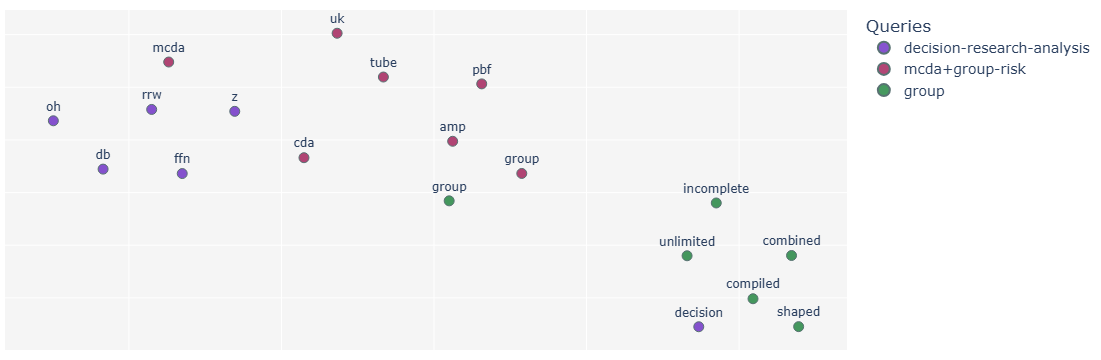

In [71]:
# W2V - Operations Plot.
bibfile.plot_word_embeddings(model,
                             view      = 'notebook',
                             positive  = [ ['mcda', 'group'], ['decision'],             ['group']],
                             negative  = [ ['risk'],          ['research', 'analysis'], []       ],
                             topn      = 5,
                             node_size = 10,
                             font_size = 14)

In [90]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary, 150))

This review paper presents a comprehensive examination of the current advancements in friction stir welding (FSW) design, specifically within the
marine industry. this review paper offers a comprehensive examination of the current advancements in FSW design, specifically within the marine
industry.. this review paper offers a comprehensive examination of the current advancements in FSW design, specifically within the marine industry..
this review paper offers a comprehensive examination of the current advancements in FSW design, specifically within the marine industry.. this review
paper offers a comprehensive examination of the current advancements in FSW design, specifically within the marine industry.


In [84]:
# Filter the .bib File
# Arguments: document = A list of documents to retain. The other documents will be deleted
#            doc_type = A list of doc types. Check the 'report' to select the available types;
#            year_str = An integer the determines the starting year of collection -1 = All years;
#            year_end = An integer the determines the ending year of collection   -1 = All years;
#            sources  = A list of sources. Check the cell '# Check Sources IDs' to select the available types;
#            core     = A integer (-1, 1, 2, 3, 12, or 23) -1 = All sources, 1 = Bradford core 1, 2 = Bradford core 2, 3 = Bradford core 3, 12 = Bradford core 1 and 2, 23 = Bradford core 2 and 3;
#            country  = A list of countries. Check the cell '# Check Countries IDs' to select the available types;
#            language = A list of languages. Check the 'report' to select the available types
#            abstract = True or False. True removes UNKNOW values from the abstract.
bibfile.filter_bib(documents = [], doc_type = [], year_str = -1, year_end = -1, sources = [], core = -1, country = [], language = [], abstract = False)

A Total of 169 Documents Remains

Article = 86
Book = 7
Book chapter = 19
Conference paper = 12
Editorial = 1
Review = 43
Short survey = 1


In [86]:
# Correct the .bib File
# Arguments: get         = A list of the current name(s);
#            replace_for = A string. This string will replace all matchs from the 'get' argument list
bibfile.merge_author(get = [], replace_for = 'name')
bibfile.merge_institution(get = [], replace_for = 'name')
bibfile.merge_country(get = [], replace_for = 'name')
bibfile.merge_language(get = [], replace_for = 'name')
bibfile.merge_source(get = [], replace_for = 'name')